Computational times elapsed by MC codes for isotopes in water 

/scratch/petgfn/Robert/PRcomp/analysis.py:367: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


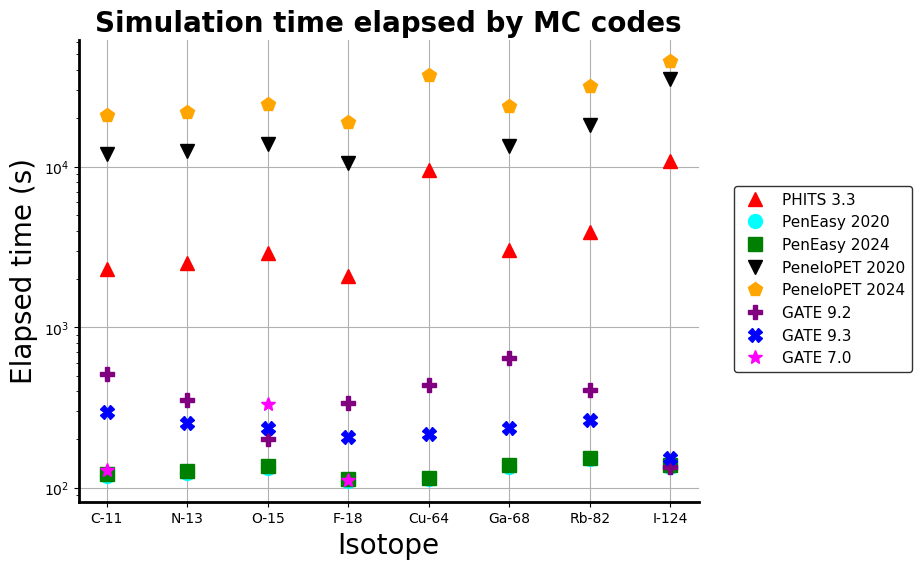

In [1]:
import itertools, re
import numpy as np
import matplotlib.pyplot as plt
from analysis import aesthetic_plot, iso_in_plots

isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] 
tfiles = {
    "PHITS 3.3":"PHITS_xyz/PHITS_times.txt",
    "PenEasy 2020":"PenEasy2020_xyz/SPC_times.txt",
    "PenEasy 2024":"PenEasy2024_xyz/SPC_times.txt",
    "PeneloPET 2020":"PeneloPET2020_xyz/2020_times.txt",
    "PeneloPET 2024":"PeneloPET2024_xyz/2024_times.txt",
    "GATE 9.2":"GATE92_xyz/9_times.txt",
    "GATE 9.3":"GATE93_xyz/9_times.txt",
    "GATE 7.0":"GATE7_xyz/GATE7_times.txt",
}

colors = itertools.cycle(['red', 'cyan', 'green', 'black', 'orange', 'purple', 'blue', 'magenta']) 
shapes = itertools.cycle(['^', 'o', 's', 'v', 'p', 'P', 'X', '*'])

plt.figure(figsize=(8, 6))
for pname, tfile in tfiles.items():
    # load file with times to a dictionary
    tf = f"RESULTS/SPC/Water/{tfile}"
    data = np.loadtxt(tf, usecols=(0, 1), dtype=str)
    sort_idx = np.argsort([int(re.search(r'\d+', iso).group()) for iso in map(iso_in_plots, data[:,0])])
    data = data[sort_idx]
    isos = list(map(iso_in_plots, data[:,0]))
    times = data[:,1].astype(float)
    
    # plot times for each program
    plt.plot(isos, times, label=pname, color=next(colors), marker=next(shapes), markersize=10, linestyle='None')

plt.ylabel("Elapsed time (s)", fontsize=20)
plt.xlabel("Isotope", fontsize=20)
plt.title("Simulation time elapsed by MC codes", fontsize=20, fontweight='bold')
plt.yscale('log')
ax, leg = aesthetic_plot(legend_size=11)
leg.set_loc('upper center')
leg.set_bbox_to_anchor((1.2, 0.7))
